In [1]:
import paths

from datasdoc.pipeline import image_to_table

from datasdoc.feature_extraction import TriangulationGenerator

In [2]:
file = "/tmp/downloads/test_2/de076f6796163fc9bd2813a6e6652f41.jpg"

X = image_to_table(language="eng+deu").transform(file)

In [3]:
X.attrs["name"]

'de076f6796163fc9bd2813a6e6652f41.jpg-OtsuThreshold'

In [21]:
tri = TriangulationGenerator().transform(X)

In [22]:
import numpy as np
import pandas

idx = [
    0, 1, 1, 2, 2, 0, 
    1, 0, 2, 1, 0, 2
]

neighbors = np.reshape(X.index[tri.simplices][:, idx], (-1, 2))
neighbors = (
    pandas
    .DataFrame(neighbors)
    .groupby(0)
    .agg(set)
)

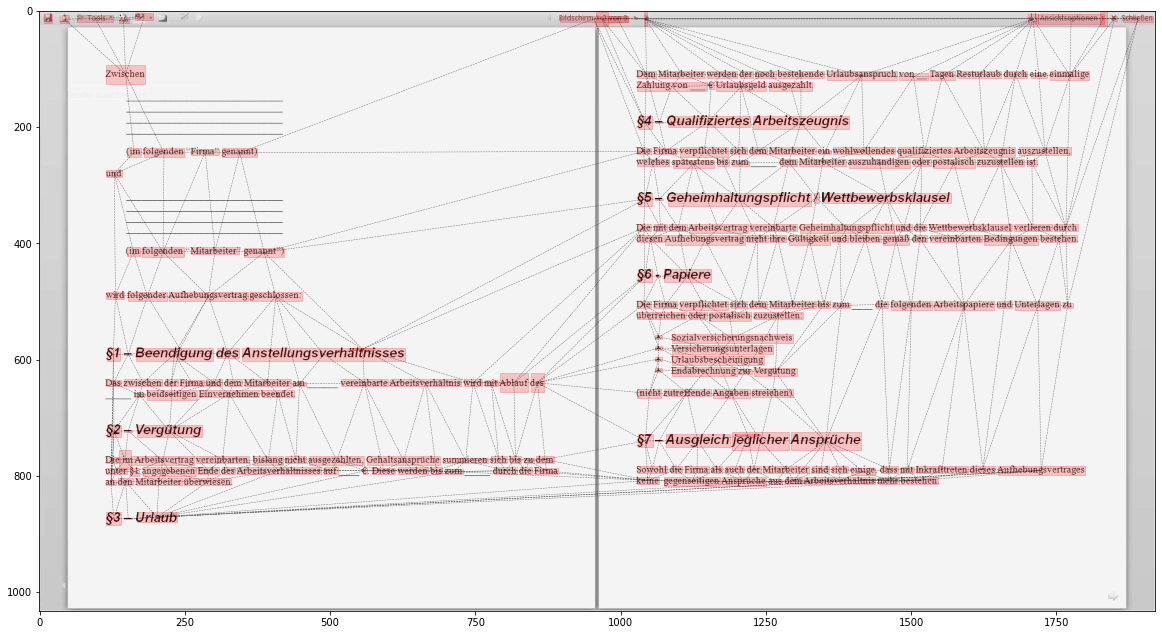

In [23]:
from datasdoc.visualization import feature_plot

fig = feature_plot(file, X, tri, outputfile="test.png", dpi=120)
